### Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [2]:
%matplotlib inline
rcParams['figure.figsize']=5,4

In [6]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

#### Multiple Linear Regression on the enrollment data

In [10]:
enroll = pd.read_csv(r"C:\Users\Ramesh\Desktop\enrollment_forecast.csv")
enroll.columns = ['year','roll','unem','hgrade','inc']
enroll.head()
#Taken from New Mexico and year start 1961.. 1 is 1961. roll- enrollment num,unem- unemployment,hgrad -graduationrate,inc-local income

,year,roll,unem,hgrade,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


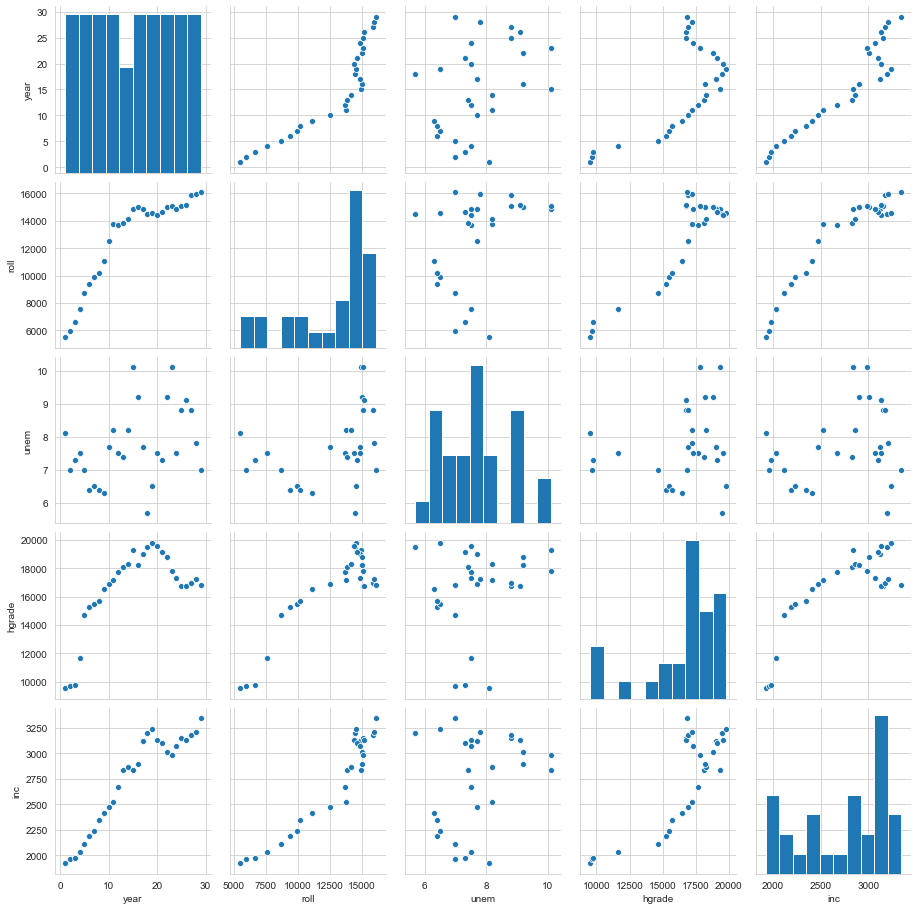

In [11]:
sb.pairplot(enroll)

In [12]:
print(enroll.corr()) #checking correlation of enroll dataframe

            year      roll      unem    hgrade       inc
year    1.000000  0.900934  0.378305  0.670300  0.944287
roll    0.900934  1.000000  0.391344  0.890294  0.949876
unem    0.378305  0.391344  1.000000  0.177376  0.282310
hgrade  0.670300  0.890294  0.177376  1.000000  0.820089
inc     0.944287  0.949876  0.282310  0.820089  1.000000


##### we just want to make sure that our predictors are not completely dependent on one another. That would definitely not be good for a linear regression. So let's look at hgrad and unemployment correlation. We have unemployment on this line and hgrad, okay, wow, so the hgrad variable and unemployment are definitely not showing linear correlation.

In [16]:
enroll_data = enroll[['unem','hgrade']].values
enroll_target = enroll['roll'].values

enroll_data_names = ['unem','hgrade']
X, y =scale(enroll_data),enroll_target

#### Check for missing values

In [18]:
missing_values = X == np.NAN 
X[missing_values ==True]

array([], dtype=float64)

In [19]:
LinReg = LinearRegression(normalize = True)
LinReg.fit(X,y)

print(LinReg.score(X,y))

0.8488812666133723


##### the score that's printed out here is the R square of the prediction. It's a measure of how well the regression line that was predicted by the model actually matches the real values for college enrollment. Basically it is telling us how well the model performs in predicting college enrollment. A maximum good score would be .99 and a minimum score would be .01